In [85]:
## Pymaceuticals Inc.

In [86]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import sem

In [87]:
# Store filepaths in variables
Study_results ="C://Users//Angiescomputer//Desktop//-Pymaceuticals-Inc-homework//Study_results.csv"
Mouse_metadata ="C://Users//Angiescomputer//Desktop//-Pymaceuticals-Inc-homework//Mouse_metadata.csv"


In [88]:
# Read our data files with the pandas library
Study_results_df = pd.read_csv("C://Users//Angiescomputer//Desktop//-Pymaceuticals-Inc-homework//Study_results.csv")
Mouse_metadata_df = pd.read_csv("C://Users//Angiescomputer//Desktop//-Pymaceuticals-Inc-homework//Mouse_metadata.csv")

In [89]:
Study_results_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [90]:
Mouse_metadata_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [91]:
# Merge data on Mouse ID
merged_df = pd.merge(Study_results_df, Mouse_metadata_df, on=('Mouse ID'))
merged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [92]:
# Group tumor_vol_df by 'Drug' and 'Timepoint'
# Calculate mean and standard error of the mean (sem) for the 'Tumor Volume'
tumor_vol_df = merged_df.loc[:,['Drug Regimen','Timepoint','Tumor Volume (mm3)']]
tumor_vol_df.head()

,Drug Regimen,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,45.651331
2,Capomulin,10,43.270852
3,Capomulin,15,43.784893
4,Capomulin,20,42.731552


In [93]:
# Group tumor_vol_df by 'Drug' and 'Timepoint'
# Calculate mean and standard error of the mean (sem) for the 'Tumor Volume'
mean_sem_tv = tumor_vol_df.groupby(['Drug Regimen', 'Timepoint']).agg({"Tumor Volume (mm3)" :["mean", "sem"]})
mean_sem_tv.head()

Tumor Volume (mm3)          
                                     mean       sem
Drug Regimen Timepoint                             
Capomulin    0                  45.000000  0.000000
             5                  44.266086  0.448593
             10                 43.084291  0.702684
             15                 42.064317  0.838617
             20                 40.716325  0.909731

In [94]:
# Create lists of the tumor volume means for each of the four drugs being compared
cap_tvmean_list = mean_sem_tv.loc['Capomulin'].loc[:, 'Tumor Volume (mm3)'].loc[:,'mean'].tolist()
inf_tvmean_list = mean_sem_tv.loc['Infubinol'].loc[:, 'Tumor Volume (mm3)'].loc[:,'mean'].tolist()
ram_tvmean_list = mean_sem_tv.loc['Ramicane'].loc[:, 'Tumor Volume (mm3)'].loc[:,'mean'].tolist()
cef_tvmean_list = mean_sem_tv.loc['Ceftamin'].loc[:, 'Tumor Volume (mm3)'].loc[:,'mean'].tolist()

In [95]:
# Create lists of the tumor volume sems for each of the four drugs being compared
cap_tvsem_list = mean_sem_tv.loc['Capomulin'].loc[:, 'Tumor Volume (mm3)'].loc[:,'sem'].tolist()
inf_tvsem_list = mean_sem_tv.loc['Infubinol'].loc[:, 'Tumor Volume (mm3)'].loc[:,'sem'].tolist()
ram_tvsem_list = mean_sem_tv.loc['Ramicane'].loc[:, 'Tumor Volume (mm3)'].loc[:,'sem'].tolist()
cef_tvsem_list = mean_sem_tv.loc['Ceftamin'].loc[:, 'Tumor Volume (mm3)'].loc[:,'sem'].tolist()

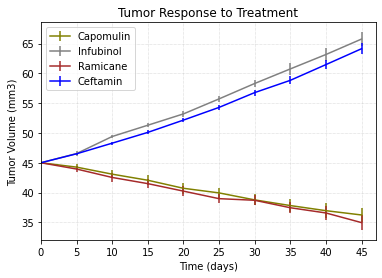

In [96]:
# Scatter plot showing how tumor volume changes over time for each treatment

ax = plt.subplot(111)

# Set the x axis from 0 to 45 in increments of 5
x_axis = np.arange(0, 50, 5)

# Set the plot title and axes titles
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")

# Plot the 'mean' list vs. the established x axis with error 
ax.errorbar(x_axis, cap_tvmean_list, yerr=cap_tvsem_list, fmt="olive",
                   label="Capomulin")
ax.errorbar(x_axis, inf_tvmean_list, yerr=inf_tvsem_list, fmt="gray",
                   label="Infubinol")
ax.errorbar(x_axis, ket_tvmean_list, yerr=ket_tvsem_list, fmt="brown",
                   label="Ramicane")
ax.errorbar(x_axis, plc_tvmean_list, yerr=plc_tvsem_list, fmt="blue",
                   label="Ceftamin")

# Add the legend and gridlines
ax.legend(loc=2)

tick_locations = [value for value in x_axis]
ax.set_xticks(tick_locations, minor=False)
ax.grid('on', which='major', axis='both', linestyle='dotted', linewidth=0.5)

plt.xlim(0, max(x_axis)+2)
        
# Show the resulting scatter plot
plt.show()

In [97]:
meta_sites_df = merged_df.loc[:,['Drug Regimen', 'Timepoint', 'Metastatic Sites']]
meta_sites_df.head()

,Drug Regimen,Timepoint,Metastatic Sites
0,Capomulin,0,0
1,Capomulin,5,0
2,Capomulin,10,0
3,Capomulin,15,0
4,Capomulin,20,0


In [98]:
# Group meta_sites_df by 'Drug' and 'Timepoint'
# Calculate mean and standard error of the mean (sem) for the 'Metastatic Sites'
mean_sem_meta = meta_sites_df.groupby(['Drug Regimen', 'Timepoint']).agg({"Metastatic Sites" :["mean", "sem"]})
mean_sem_meta.head()

Metastatic Sites          
                                   mean       sem
Drug Regimen Timepoint                           
Capomulin    0                 0.000000  0.000000
             5                 0.160000  0.074833
             10                0.320000  0.125433
             15                0.375000  0.132048
             20                0.652174  0.161621

In [99]:
# Create lists of the metastatic sites means for each of the four drugs being compared
cap_mtmean_list = mean_sem_meta.loc['Capomulin'].loc[:, 'Metastatic Sites'].loc[:,'mean'].tolist()
inf_mtmean_list = mean_sem_meta.loc['Infubinol'].loc[:, 'Metastatic Sites'].loc[:,'mean'].tolist()
ram_mtmean_list = mean_sem_meta.loc['Ramicane'].loc[:, 'Metastatic Sites'].loc[:,'mean'].tolist()
cef_mtmean_list = mean_sem_meta.loc['Ceftamin'].loc[:, 'Metastatic Sites'].loc[:,'mean'].tolist()

In [100]:
# Create lists of the metastatic sites sems for each of the four drugs being compared
cap_mtsem_list = mean_sem_meta.loc['Capomulin'].loc[:, 'Metastatic Sites'].loc[:,'sem'].tolist()
inf_mtsem_list = mean_sem_meta.loc['Infubinol'].loc[:, 'Metastatic Sites'].loc[:,'sem'].tolist()
ram_mtsem_list = mean_sem_meta.loc['Ramicane'].loc[:, 'Metastatic Sites'].loc[:,'sem'].tolist()
cef_mtsem_list = mean_sem_meta.loc['Ceftamin'].loc[:, 'Metastatic Sites'].loc[:,'sem'].tolist()

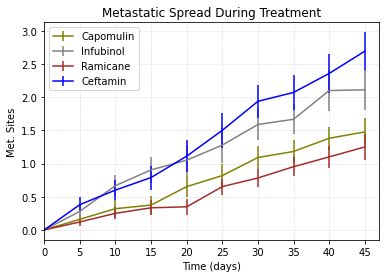

In [101]:
# Scatter plot showing metastatic spread over time for each treatment

ax = plt.subplot(111)

# Set the x axis from 0 to 45 in increments of 5
x_axis = np.arange(0, 50, 5)

# Set the plot title and axes titles
plt.title("Metastatic Spread During Treatment")
plt.xlabel("Time (days)")
plt.ylabel("Met. Sites")

# Plot the 'mean' list vs. the established x axis with error 
ax.errorbar(x_axis, cap_mtmean_list, yerr=cap_mtsem_list, fmt="olive",
                   label="Capomulin")
ax.errorbar(x_axis, inf_mtmean_list, yerr=inf_mtsem_list, fmt="gray",
                   label="Infubinol")
ax.errorbar(x_axis, ket_mtmean_list, yerr=ket_mtsem_list, fmt="brown",
                   label="Ramicane")
ax.errorbar(x_axis, plc_mtmean_list, yerr=plc_mtsem_list, fmt="blue",
                   label="Ceftamin")

# Add the legend and gridlines
ax.legend(loc=2)

tick_locations = [value for value in x_axis]
ax.set_xticks(tick_locations, minor=False)
ax.grid('on', which='major', axis='both', linestyle='dotted', linewidth=0.5)

plt.xlim(0, max(x_axis)+2)
        
# Show the resulting scatter plot
plt.show()

In [102]:
# Get the mouse survival rate over time grouped by 'Drug' and 'Timepoint
mouse_count = merged_df.groupby(['Drug Regimen', 'Timepoint'])['Timepoint'].count()
mouse_count.head()

Drug Regimen  Timepoint
Capomulin     0            25
              5            25
              10           25
              15           24
              20           23
Name: Timepoint, dtype: int64

In [103]:
# Create lists of the mouse counts for each of the four drugs at the different timepoints
cap_surv_list = mouse_count.loc['Capomulin'].tolist()
inf_surv_list = mouse_count.loc['Infubinol'].tolist()
ram_surv_list = mouse_count.loc['Ramicane'].tolist()
cef_surv_list = mouse_count.loc['Ceftamin'].tolist()

In [104]:
# List comprehension to get the mouse survival rate
# Each value in the lists is divided by the first value of the respective list to get a percentage
cap_survrate = [(x/cap_surv_list[0])*100 for x in cap_surv_list]
inf_survrate = [(x/inf_surv_list[0])*100 for x in inf_surv_list]
ram_survrate = [(x/ram_surv_list[0])*100 for x in ram_surv_list]
cef_survrate = [(x/cef_surv_list[0])*100 for x in cef_surv_list]

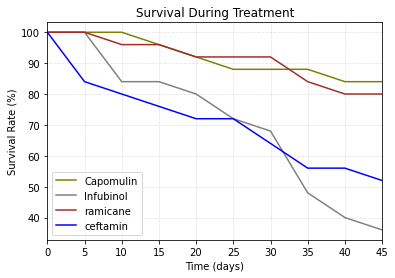

In [105]:
# Scatter plot showing mouse survival rate over time for each treatment

ax = plt.subplot(111)

# Set the x axis from 0 to 45 in increments of 5
x_axis = np.arange(0, 50, 5)

# Set the plot title and axes titles
plt.title("Survival During Treatment")
plt.xlabel("Time (days)")
plt.ylabel("Survival Rate (%)")

# Plot the 'mean' list vs. the established x axis with error 
ax.plot(x_axis, cap_survrate, color="olive", label="Capomulin")
ax.plot(x_axis, inf_survrate, color="gray", label="Infubinol")
ax.plot(x_axis, ram_survrate, color="brown", label="ramicane")
ax.plot(x_axis, cef_survrate, color="blue", label="ceftamin")

# Add the legend and gridlines
ax.legend(loc=3)

tick_locations = [value for value in x_axis]
ax.set_xticks(tick_locations, minor=False)
ax.grid('on', which='major', axis='both', linestyle='dotted', linewidth=0.5)

plt.xlim(0, max(x_axis))
        
# Show the resulting scatter plot
plt.show()

In [106]:
# Calculate the correlation coefficient and linear regression model
cap_tv_change = int(((cap_tvmean_list[-1] - cap_tvmean_list[0])/cap_tvmean_list[0])*100)
inf_tv_change = int(((inf_tvmean_list[-1] - inf_tvmean_list[0])/inf_tvmean_list[0])*100)
ram_tv_change = int(((ram_tvmean_list[-1] - ram_tvmean_list[0])/ram_tvmean_list[0])*100)
cef_tv_change = int(((cef_tvmean_list[-1] - cef_tvmean_list[0])/cef_tvmean_list[0])*100)

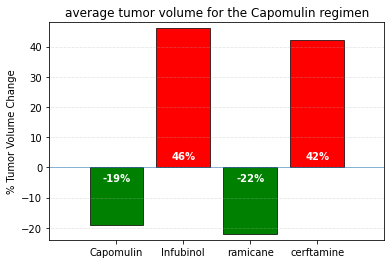

In [108]:
#for mouse weight and average tumor volume for the Capomulin regimen

# y values using a list
y = [cap_tv_change, inf_tv_change, ram_tv_change, cef_tv_change]
# Set the x axis from 0 to 45 in increments of 5
x_axis = np.arange(len(y))

# Set the colors of the bars depending on if pos or neg
# Neg % are green
# Pos % are red
colors = []
for item in y:
    if item < 0:
        colors.append('green')
    else:
        colors.append('red')

# Set up the bar graph 
tumor_growth_bar = plt.bar(x_axis, y, color=colors, alpha=1.0, edgecolor='black', linewidth=0.7)

# Set the plot title and axes titles
plt.title("average tumor volume for the Capomulin regimen")
plt.ylabel("% Tumor Volume Change")

# plt.xticks() set the location and labels of the ticks on the x axis
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Infubinol", "ramicane", "cerftamine"])

# Set the limit of the x and y axes. lim(start, end)
plt.xlim(-1, len(x_axis))
plt.ylim(min(y)-2, max(y)+2)

# Plot horizontal line at y=0
plt.hlines(0, -1, len(x_axis), alpha=1.0, linewidth=0.5)

# Add gridlines
plt.grid('on', which='major', axis='y', linestyle='dotted', linewidth=0.5)

# Set up labels with the percentage change for each bar
def autolabel(rects):
    for i,rect in enumerate(rects):
        height = int(y[i])
        if height >= 0:
            plt.text(rect.get_x()+rect.get_width()/2., 2, '%s%%'% (y[i]),
                ha='center', va='bottom', color='white', weight='bold')
        else:
            plt.text(rect.get_x()+rect.get_width()/2., -2, '%s%%'% (y[i]),
                ha='center', va='top', color='white', weight='bold')          

autolabel(tumor_growth_bar)

# Show the resulting scatter plot
plt.show()